# Session 7: Urban Analytics through Social Media

In this session, we will learn:
- How to retrieve and analyse unstructured geo-text.
- How to apply WordCloud to visualise text information.
- How to extract the hidden topics from large volumes of text by applying Latent Dirichlet Allocation(LDA).

Required packages include:
- [pandas](https://pandas.pydata.org/docs/getting_started/install.html)
- [wordcloud](https://pypi.org/project/wordcloud/)
- [gensim](https://pypi.org/project/gensim/)
- [nltk](https://www.nltk.org/install.html)
- [folium](https://pypi.org/project/folium/)

Mostly, you can use the commond like `pip install pandas` to install the packages. However, the environment has been configured in advance, so you can skip this step directly.

## 1 Retrieve data from location-based social media

We can retrieve information from many location-based social media, such as Foursqure, Tweeter, Google Places, Yelp, and so on. The key technique of doing so is through API (Application Programming Interface), which helps to bridge your program with the database these services are using/collecting. In this session, you don't need to retrieve the data from the beginning (but API is an important tool you will learn from MSc in GDSSA). We have already shared the cleaned data in the forder. In the next steps, let's load the data directly.

### 1.1 Loading data

In this session, we mainly use two datasets: Foursquare and Yelp. You can choose either one for your experiment. If you downloaded `Foursquare_response.csv` to your local directory, you should be able to load the data by running:

In [3]:
import pandas as pd
# Read the file
examples = pd.read_csv('./Foursquare_response.csv')# make sure the directory is correct in your case

There are many operations in Python to view/describe your data. For example, you can use `.head()` to check the first several rows of your dataframe, `.info()` to have a list of information about your dataframe (you are suggested to always run it first after your data is loaded).

In [4]:
# How does it look?
examples.head()

,Name,Category,Latitude,Longitude,Address
0,Pinkmans,Bakery,51.455421,-2.604227,"85 Park St, Bristol, BS1 5PJ"
1,Bristol City Museum and Art Gallery,History Museum,51.456186,-2.605088,"Queens Rd (West End), Bristol, BS8 1RL"
2,Beerd,Beer Garden,51.461178,-2.602556,"157-159 St Michaels Hill, Cotham, Bristol, BS2..."
3,Brandon Hill,Park,51.453331,-2.606786,"Brandon Hil, Bristol, BS1 5RR"
4,Everyman Cinemas,Movie Theater,51.463024,-2.609355,"Whiteladies Rd (Melrose Pl), Bristol, BS8 2NH"


Foursquare data includes geographic information of local venues in a city (Bristol, as an example, in this practical), such as latitude, longitude, address, category, and name of the venue. Geographic coordinates (latitude + longitude) are very important variables in urban analysis! 

We can use geographic coordinates to visualise and map locations. 

## 2 Mapping the data

There is a Python library called `Folium` that makes it possible to visualise geographic data in Python on an interactive Leaflet map (Leaflet is a Javascript library to build interactive maps. `Folium` is a Python library that encapsulates functions of Leaflet allowing its re-use in Python). 

Note that there are other ways to visualise geographic data, which will be taught at MSc in GDSSA. 

In [13]:
import folium
# Create a map centered around the mean latitude and longitude (this can be regarded as the centroid of the point pattern of Foursquare/Yelp venues)
center_lat = examples['Latitude'].mean()
center_lon = examples['Longitude'].mean()
map_ = folium.Map(location=[center_lat, center_lon], zoom_start=18,control_scale=True)



The first parameter `location` takes a pair of latitude, longitude values as an input (organized as a list) which will determine where the map will be positioned when users create the map. `zoom_start` parameter adjusts the default zoom-level for the map (the larger the number the closer the map is zoomed at). `control_scale` defines if the map should have a scale bar or not.

Let’s see what the map looks like!

In [14]:
# Display the map
map_

Next, we can start visualising our data using `Folium`.

In [15]:
# Create a map centered around the mean latitude and longitude
center_lat = examples['Latitude'].mean()
center_lon = examples['Longitude'].mean()
map_ = folium.Map(location=[center_lat, center_lon], zoom_start=16)

# Add markers for each location in the data
for index, row in examples.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Category: {row['Category']}"  # Use 'Category' for the popup label
    ).add_to(map_)

# Display the map
map_


That’s it! Now we have a cool interactive map with some markers on it, marking the distribution of our data and what category each point is.

## 3 WordCloud to perform word frequency analysis

Now that we know the spatial distribution of local venues in Bristol, what else are you curious about?

In addition to geographic information (coordinates), the interactive map also shows the category of each local venue. Then, one might be wondering which catrgory is most popular in my study area (e.g. Bristol in this practical)? 

To answer this question, we should compute the frequency of each category in our data. In this practical, we will use `WordCloud` to do it. `WordCould` draws a “cloud” of words, where the position and size of the word is determined by its frequency in the document. In Python, we can use the package `wordcloud` to implement it. 

However, `WordCloud` is a natural language processing (NLP) method; hence the input to this model must be a document contaning a collection of words. In order to adopt this technique, what is the document in our case study?

There can be many ways and you are encouraged to be creative in answering this question. One way we will explore here is to regard the whole City of Bristol as a document. Its words/tokens are those local venues' categories.

First, let's concatenate all the text content from the ‘Category’ column in the ‘Foursquare_response’ dataset into a single long string: `text`. We will later regard this variable as a document.  

In [16]:
text = ' '.join(examples['Category'])

Next, we will directly call `WordCloud()` function in python. See comments below for details of using this function. 

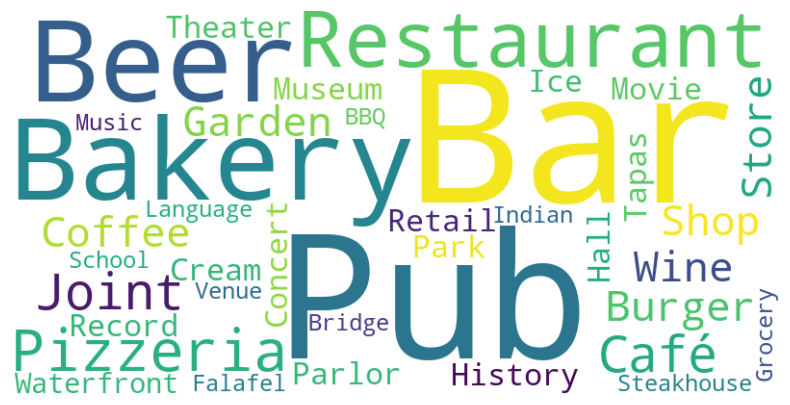

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object and generate the word cloud from the text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# width=800, height=400: Set the width and height of the word cloud image to 800x400 pixels
# background_color='white': Set the background color of the word cloud image to white
# generate(text): Generate the word cloud image from the concatenated text

# Create a figure to display the word cloud
plt.figure(figsize=(10, 5))
# figsize=(10, 5): Set the size of the figure to 10x5 inches

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
# imshow(wordcloud): Display the word cloud image
# interpolation='bilinear': Use bilinear interpolation to smooth the image

# Hide the axes
plt.axis('off')
# axis('off'): Hide the axes for a cleaner look

# Show the figure
plt.show()

### Group Discussion - Q1

Is this result correct? (Hint: check the data content displayed by `.head()` in the previous step again!)

Actually, `wordcloud` library uses space as delimiters to distinguish words by default. Therefore, phrases like "History Museum" will be split into two separate words, "History" and "Museum". Therefore, we need to do a little preprocessing on this data set. See code below on how to implement it in Python. 

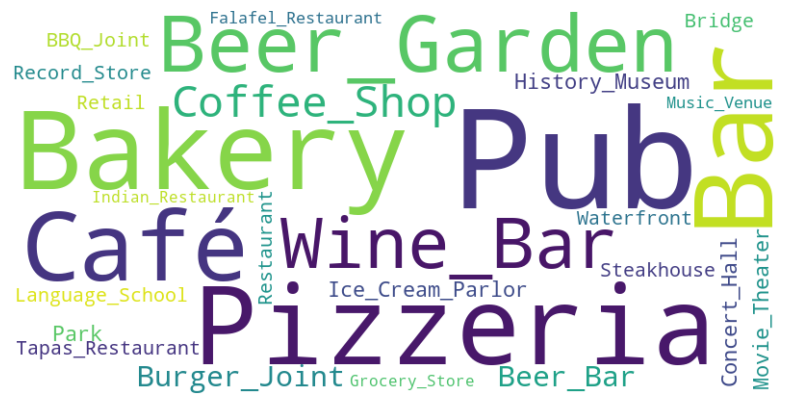

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Replace the space in the Category column with underscores.
modified_categories = examples['Category'].str.replace(' ', '_')

# Join into a single string
text = ' '.join(modified_categories)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Task 1- Practicing WordCloud technique with Yelp data

OK! It's your turn! Could you implement a word cloud using the Yelp data set? 

You only need to do two things: load the Yelp data, which is already cleaned and shared, and draw a word cloud based on its column `Review` using similar code as we've covered so far.

Discuss within your team, which word(s) appear most frequently in Yelp's reviews? Any insights from the result?   Please upload your conclusion to our Padlet!

## 4 Topic Modelling on Yelp's reviews

`WordCloud` visualizes key vocabularies and their frequencies in a document. By regarding a city (or a region) as a document and place categories as its words, this technique enables us to directly understand which place categories dominates the city (or region) the most, based on which we could estimate the city/region's major functionality. For instance, you could see "Pub" occurs most frequently in the dataset, so our study region might be a cluster of pubs. This technique is useful; however, simply using frequency might miss the meaning of these words. For instance, the term "Pub" might be similar to "Bar" in semantics. 

To fill this gap, topic modeling is introduced in NLP. It performs deeper analysis of textual data by inferring the distribution of topics across each document, thereby revealing the (implicit) semantics underlying the text. Hence, it could capture more complex meanings hidden in texts, rather than simply relying on the frequency of words. It heavily involves probablistic models. Topic modeling is useful for the purpose of document clustering, information retrieval from unstructured text, feature selection, etc.

There are many such topic modeling methods, including Latent Semantic Analysis or Indexing(LSA/LSI), Hierarchical Dirichlet process (HDP), and Latent Dirichlet Allocation(LDA). We will cover LDA in this session due to its popularity.

LDA considers each document as a collection of topics and each topic as collection of words/terms. You can see there is a hidden/middle layer - called topic - here between document and words. Once you set up the parameters (e.g., the number of topics), the model will then optimise the topic distribution of the document, as well as the word distribution of each topic.

In this experiment, we will use the dataset `Yelp` and its column `Review` to introduce how LDA works. Note that it may not be a good dataset because it is relatively small, so the result may be difficult to interpret. You could later try the method on a larger dataset yourself. 

Make sure the following libraries are installed and imported:

In [23]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize

In [25]:
Yelp_dataset=pd.read_csv('./Yelp_cleaned(new).csv')# make sure the directory is correct in your case

Since LDA tries to model the semantic distribution of words/terms for documents, with topics as the latent variable, we need to pre-process a bit of the text-based `Review` column. Namely, the data (text) must be converted to a matrix that can be processed by python. The matrix here is called Document-Term Matrix (DTM).   

Document-Term Matrix (DTM) is a matrix that represents the frequency of terms in a document. Each row represents a document, each column represents a term, and each element in the matrix represents the frequency of a term in a document. This is a very intuitive way to convert text-based paragraphs/sentences into numbers.

The library of `gensim` has a specific way of generating the Document-Term Matrix. First, we need to create a corpus, which is a collection of all the words/terms that have been used in the `Review` column. By doing so, we iterate each row of the `Review` column, convert all words into their lower cases, and tokenize the sentences. Tokenize here means to separate a full sentence into a collection of individual words/terms.

In [26]:
corpus = [word_tokenize(review.lower()) for review in Yelp_dataset['Review']]# Tokenize each review in the Yelp_dataset, converting all text to lowercase

The resulted `corpus` is a list of list. The outer list is a collection of reiviews. Later, each review will be regarded as a document. The inner list is a collecton of words/terms that are used in the review.  Next, we need to convert this corpus to an object of `Dictionary` (defined by `gensim`). This `Dictionary` object is a mapping that includes all unique words/terms that appear in the `corpus`, each associated with a unique ID.  

In [27]:
dictionary = Dictionary(corpus)#create a dictionary obejct using the corpus
print(dictionary)

Dictionary<2781 unique tokens: ["'pieminister", 'adore', 'drastic', 'like', 'love']...>


Finally, we could generate the DTM object using `doc2bow()` function. `bow` here means “bag-of-words”.

In [28]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus] #Create document-term matrix
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1)],
 [(3, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(3, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [(35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1)],
 [(3, 1),
  (16, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(4, 1),
  (36, 1),
  (46, 1),
  (57, 1),
  (61, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1)],
 [(28, 1),
  (57, 1),
  (66, 1),
  (75, 1),
  (77, 

The `doc2bow()` method converts documents into a bag-of-words representation. In this representation, each document is represented as a list containing word IDs and their frequencies. For example, a document might be represented as (word_id1, count1), (word_id2, count2), ..., where word_id is the ID of the word, and count is the number of times that word appears in the document.

The resulted `doc_term_matrix` variable is a list of list. Specifically, the inner list represent a document/review, where the tuples indicate the index of the word and its frequency. For example, for the first document/review [(0, 1), (1, 1), (2, 1), ...], the 0th word is repeated once in the review, the 1st word repeated once, and the 2nd word repeated once, and so on. 

With such a Document-Term Matrix, we could then build a LDA model. One example of the code is shown as below:

In [29]:
num_topics = 2
lda_model = LdaModel(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=0,
    eval_every=None
)
#Adjust the above parameters and observe what happens.


To generate an LDA model, we input the `corpus`, represented as `doc_term_matrix` now, together with several parameters.

`num_topics`: indicates the number of topics that will be used in the model

`id2word`: is the vocabulary generated from the `corpora.Dictionary()` function

`random_state`: used for reproducibility (because we need to randomly initialize some weights of the model, everytime you run the model, it might result into different outputs. Setting up a seed value here guarantees you that the models will be trained the same if input data and parameters are all the same)

`eval_every`: Log perplexity (an evaluation metric for the model) is estimated every that many updates. If it is `None`, the model will only be evaluated at the end of the training.

After the model is built, we can then see how the topic(s) are represented:

In [30]:
# print topic words
for topic_idx, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print(f"Topic {topic_idx}:")
    print(" ".join([word for word, _ in topic]))


Topic 0:
food restaurant good one bristol great place really service best
Topic 1:
place great good food one bristol little pub love like


Another way of showing the topic (and its distribution):

In [31]:
lda_model.print_topics()

[(0,
  '0.019*"food" + 0.010*"restaurant" + 0.009*"good" + 0.009*"one" + 0.009*"bristol" + 0.009*"great" + 0.008*"place" + 0.007*"really" + 0.006*"service" + 0.005*"best"'),
 (1,
  '0.015*"place" + 0.008*"great" + 0.008*"good" + 0.008*"food" + 0.006*"one" + 0.006*"bristol" + 0.005*"little" + 0.005*"pub" + 0.005*"love" + 0.004*"like"')]

As can be seen, the two topics (listed as 0 and 1) are reprsented as a distribution of words, and each of the 2781 unique words is given weights based on their importances in representing the topics. In other words, it implies which word is more likely to be used in the specific topic.

For example, Topic 0 seems to be focused on positive reviews of restaurants in Bristol with words like "good", "food", and "restaurant" being heavily used. In contrast, Topic 1 seems to be focused on a small pub or a similar place in Bristol, where reviewers expressed their enjoyment and satisfaction with the place.

With these topics and their representations, we can next check how each document (people's review on Yelp) is represented using the topic:

In [32]:
count = 0 # used to indicate the index of document (review)
for i in lda_model[doc_term_matrix]: # we iterate over the lda_model variable and i is the distribution of each doc in terms of the topics
    print("doc: ", count, i)
    count+=1

doc:  0 [(0, 0.9516063), (1, 0.048393734)]
doc:  1 [(0, 0.9226895), (1, 0.07731047)]
doc:  2 [(0, 0.033411324), (1, 0.96658874)]
doc:  3 [(0, 0.9586415), (1, 0.0413585)]
doc:  4 [(0, 0.95890945), (1, 0.04109056)]
doc:  5 [(0, 0.95685756), (1, 0.043142434)]
doc:  6 [(0, 0.6786551), (1, 0.3213449)]
doc:  7 [(0, 0.071892306), (1, 0.92810774)]
doc:  8 [(0, 0.9569107), (1, 0.043089252)]
doc:  9 [(0, 0.08626397), (1, 0.913736)]
doc:  10 [(0, 0.05186149), (1, 0.9481385)]
doc:  11 [(0, 0.9066585), (1, 0.093341574)]
doc:  12 [(0, 0.1927377), (1, 0.80726236)]
doc:  13 [(0, 0.94558847), (1, 0.05441153)]
doc:  14 [(0, 0.80707294), (1, 0.19292706)]
doc:  15 [(0, 0.039968375), (1, 0.9600316)]
doc:  16 [(0, 0.33769494), (1, 0.6623051)]
doc:  17 [(0, 0.038424168), (1, 0.96157587)]
doc:  18 [(0, 0.075372756), (1, 0.9246272)]
doc:  19 [(0, 0.038934886), (1, 0.9610651)]
doc:  20 [(0, 0.94240373), (1, 0.05759624)]
doc:  21 [(0, 0.9412325), (1, 0.058767498)]
doc:  22 [(0, 0.8240371), (1, 0.17596285)]
doc: 

From the output, we see that each document now is represented as a distribution of topics. For example, for `doc: 0`, it is represented using topic 0, and its probability is 0.9515989. Since topic 0 dominates the distribution (with a probability of 0.9515989), we can then say `doc: 0` is more about "pleasant experience at the restaurant, praising the food, service, and overall experience" (this is interpreted based on the topic distribution you get from the last step).

Note that we used a small dataset to illustrate topic modeling for urban analysis. In your future project/learning, you could apply it to a real world, bigger dataset, and you could use it creatvely too. The important take-away is that we could combine geographic data analysis with natural langurage processing to understand how human beings perceive the living environment and the world in large scale, thanks to social media data and rapid (Geo)AI advancement. This kind of approach is gaining tremendous popularity in (geographic) data science these days.     

## Task 2- Adjusting LDA parameters

Alright, it's time for you to practice! This time, you only need to modify the parameters of the LDA model and observe how changes in the parameters affect the results. Please don't limit yourself to the parameter settings provided in the sample code; you could refer to the [official documentation](https://radimrehurek.com/gensim/models/ldamodel.html) to explore additional parameters available for LDA and understand their functions and effects. Once again, please keep in mind that since this dataset is quite small, there might not be a "best" parameter setting, so feel free to experiment and discuss your creative results within your team, and share them on Padlet!